In [27]:
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
nls97 = pd.read_csv('data/nls97f.csv', low_memory=False)
nls97.set_index('personid', inplace=True)
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)

In [29]:
nls97.satverbal.head()

personid
135335    350.0
999406    460.0
151672      NaN
750699      NaN
781297      NaN
Name: satverbal, dtype: float64

In [30]:
nls97.satverbal.describe()

count    1406.000000
mean      499.724040
std       112.166256
min        14.000000
25%       430.000000
50%       500.000000
75%       570.000000
max       800.000000
Name: satverbal, dtype: float64

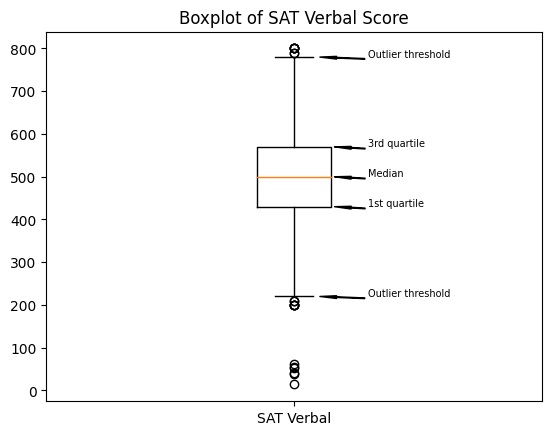

In [31]:
from turtle import width


plt.boxplot(nls97.satverbal.dropna(), labels=["SAT Verbal"])
plt.annotate('Outlier threshold', xy=(1.05, 780), xytext=(1.15, 780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08, 570), xytext=(1.15, 570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('Median', xy=(1.08, 500), xytext=(1.15, 500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08, 430), xytext=(1.15, 430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('Outlier threshold', xy=(1.05, 220), xytext=(1.15, 220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.title('Boxplot of SAT Verbal Score')
plt.show()

In [32]:
nls97.describe()

,birthmonth,birthyear,highestgradecompleted,childathome,childnotathome,nightlyhrssleep,wageincome20,satverbal,satmath,gpaoverall,...,weeksworked14,weeksworked15,weeksworked16,weeksworked17,weeksworked18,weeksworked19,weeksworked20,weeksworked21,weeksworked22,originalid
count,8984.000000,8984.000000,6663.000000,4791.000000,4791.000000,6706.000000,5201.000000,1406.000000,1407.000000,6004.000000,...,7896.000000,7767.000000,7654.000000,7496.000000,7435.000000,7237.000000,6971.000000,6627.00000,2202.000000,8984.000000
mean,6.555988,1982.010352,14.059883,1.859320,0.410144,6.637340,62888.006729,499.724040,500.590618,281.840773,...,38.729230,39.666924,40.185916,40.365528,40.009011,41.219704,38.354038,36.16976,11.425068,4504.301759
std,3.469429,1.396870,4.507592,1.259053,0.947590,1.364404,59616.290306,112.166256,114.953309,61.635667,...,20.876127,20.044437,20.942787,19.999121,20.123002,19.232814,20.753290,18.38490,10.432495,2603.135871
min,1.000000,1980.000000,5.000000,0.000000,0.000000,0.000000,0.000000,14.000000,7.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,3.000000,1981.000000,12.000000,1.000000,0.000000,6.000000,30000.000000,430.000000,430.000000,243.000000,...,26.000000,33.000000,31.000000,38.000000,35.000000,42.000000,21.000000,35.00000,2.000000,2248.750000
50%,7.000000,1982.000000,14.000000,2.000000,0.000000,7.000000,50000.000000,500.000000,500.000000,286.000000,...,52.000000,52.000000,53.000000,52.000000,52.000000,52.000000,52.000000,43.00000,9.000000,4501.500000
75%,10.000000,1983.000000,16.000000,3.000000,0.000000,8.000000,79000.000000,570.000000,580.000000,326.000000,...,52.000000,52.000000,53.000000,52.000000,52.000000,52.000000,52.000000,50.00000,19.000000,6758.250000
max,12.000000,1984.000000,95.000000,9.000000,12.000000,20.000000,380288.000000,800.000000,800.000000,417.000000,...,52.000000,52.000000,53.000000,52.000000,52.000000,52.000000,52.000000,52.00000,40.000000,9022.000000


In [33]:
weeksworked = nls97.loc[:, ['highestdegree', 'weeksworked20', 'weeksworked21']]
weeksworked.describe()

,weeksworked20,weeksworked21
count,6971.000000,6627.00000
mean,38.354038,36.16976
std,20.753290,18.38490
min,0.000000,0.00000
25%,21.000000,35.00000
50%,52.000000,43.00000
75%,52.000000,50.00000
max,52.000000,52.00000


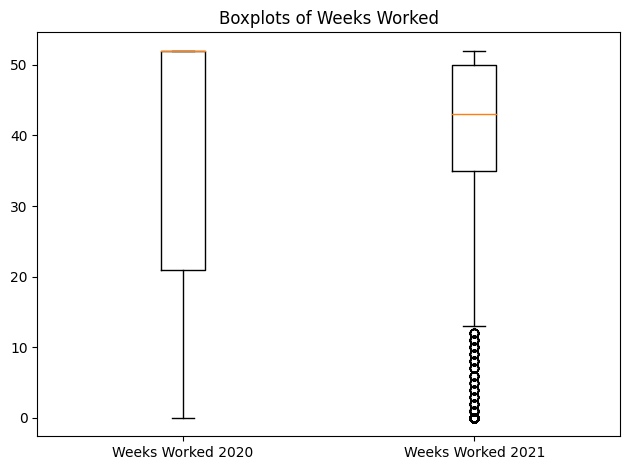

In [34]:
plt.boxplot([weeksworked.weeksworked20.dropna(), weeksworked.weeksworked21.dropna()], labels=['Weeks Worked 2020', 'Weeks Worked 2021'])
plt.title("Boxplots of Weeks Worked")
plt.tight_layout()
plt.show()


In [35]:
totvars = ['total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']

totvarslabels = ['cases', 'deaths', 'cases per million', 'deaths per million']
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.310000e+02,2.310000e+02,231.000000,231.000000
mean,3.351599e+06,3.021420e+04,206177.794623,1261.778390
std,1.148321e+07,1.047789e+05,203858.096252,1314.981529
min,4.000000e+00,0.000000e+00,354.487000,0.000000
25%,2.567150e+04,1.775000e+02,21821.863000,141.177000
50%,1.914960e+05,1.937000e+03,133946.251000,827.046000
75%,1.294286e+06,1.415000e+04,345689.831000,1997.513000
max,1.034368e+08,1.127152e+06,763475.441000,6507.656000


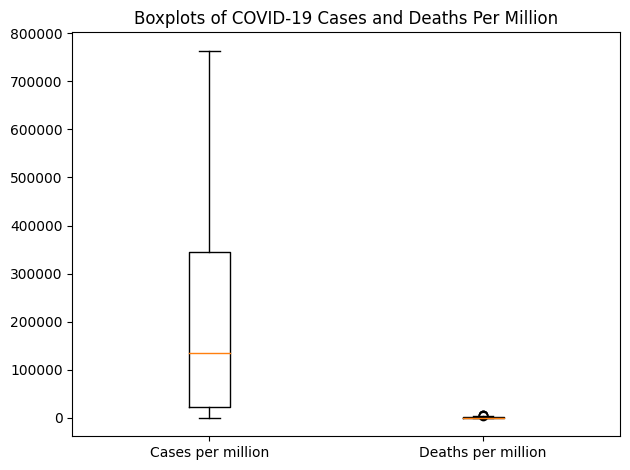

In [36]:
fig, ax = plt.subplots()
plt.title('Boxplots of COVID-19 Cases and Deaths Per Million')
ax.boxplot([covidtotals.total_cases_pm, covidtotals.total_deaths_pm], labels=['Cases per million', 'Deaths per million'])
plt.tight_layout()
plt.show()

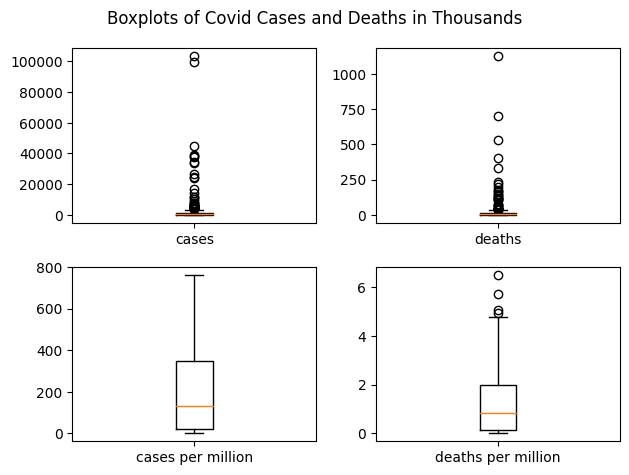

In [37]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Boxplots of Covid Cases and Deaths in Thousands")
axes = axes.ravel()
for j, ax in enumerate(axes):
    ax.boxplot(covidtotalsonly.iloc[:, j]/1000, labels=[totvarslabels[j]])

plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()